# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('customer_supermarket.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 30)

### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [ ]:
# Pega o nome das colunas que possuem valores NAN
columns_with_nans = df.columns[df.isna().any()]
for col in columns_with_nans:
  print(col)

Income


In [ ]:
# Pegando os valores do income que são NAN
income_na = df[df['Income'].isna()]
df.drop(income_na.index, inplace=True)

In [ ]:
df.shape

(2216, 30)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1976.820397,52247.251354,0.441787,0.505415,539.521209,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,202.434667,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1967.000000,35303.000000,0.000000,0.000000,366.000000,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,541.500000,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1985.000000,68522.000000,1.000000,1.000000,715.000000,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# for col in ['Recency', 'Days_Registered', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'Income']:
# Calculando o intervalo interquartil (IQR)
q1 = df['Income'].quantile(q=0.25)
q3 = df['Income'].quantile(q=0.75)
iqr = q3 - q1

# Definindo um limite de corte (por exemplo, 1.5 vezes o IQR)
limit = 1.5 * iqr
upper_limit = q3 + limit
botton_limit = q1 - limit

outliers = df[(df['Income'] > upper_limit) | (df['Income'] < botton_limit)]
# boxplot = df.boxplot(column=[col])
# plt.show()

# drop a linha dos outliers
df.drop(outliers.index, inplace=True)

In [ ]:
# for col in ['Recency', 'Days_Registered', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'Income']:
#   # Calculando o intervalo interquartil (IQR)
#   q1 = df[col].quantile(q=0.25)
#   q3 = df[col].quantile(q=0.75)
#   iqr = q3 - q1

#   # Definindo um limite de corte (por exemplo, 1.5 vezes o IQR)
#   limit = 1.5 * iqr
#   upper_limit = q3 + limit
#   botton_limit = q1 - limit

#   outliers = df[(df[col] > upper_limit) | (df[col] < botton_limit)]
#   boxplot = df.boxplot(column=[col])
#   plt.show()

In [ ]:
df.shape

(2208, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Days_Registered      2208 non-null   int64  
 9   Recency              2208 non-null   int64  
 10  MntWines             2208 non-null   int64  
 11  MntFruits            2208 non-null   int64  
 12  MntMeatProducts      2208 non-null   int64  
 13  MntFishProducts      2208 non-null   int64  
 14  MntSweetProducts     2208 non-null   int64  
 15  MntGoldProds         2208 non-null   i

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
new_df = df.loc[:, ['Recency', 'Days_Registered', 'MntTotal', 'Income']]
new_df.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


### Atividade 5: Padronize os dados.

In [ ]:
# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
new_df_scaled  = new_df.copy()

# aplicando a padronização
new_df_scaled[new_df_scaled.columns] = scaler.fit_transform(new_df_scaled)

new_df_scaled.head()

,Recency,Days_Registered,MntTotal,Income
0,0.310588,1.528348,1.541613,0.314089
1,-0.380686,-1.187681,-0.957683,-0.255431
2,-0.795450,-0.204973,0.168760,0.964782
3,-0.795450,-1.059287,-0.926002,-1.206626
4,1.554881,-0.950646,-0.339899,0.321573


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# Para fazer o dendograma, primeiramente precisamos das distâncias, que é obtida com o uso da função linkage.
# gerando a matriz de distâncias com a função linkage
distancias = linkage(new_df_scaled,
                     method='ward',
                     metric='euclidean')

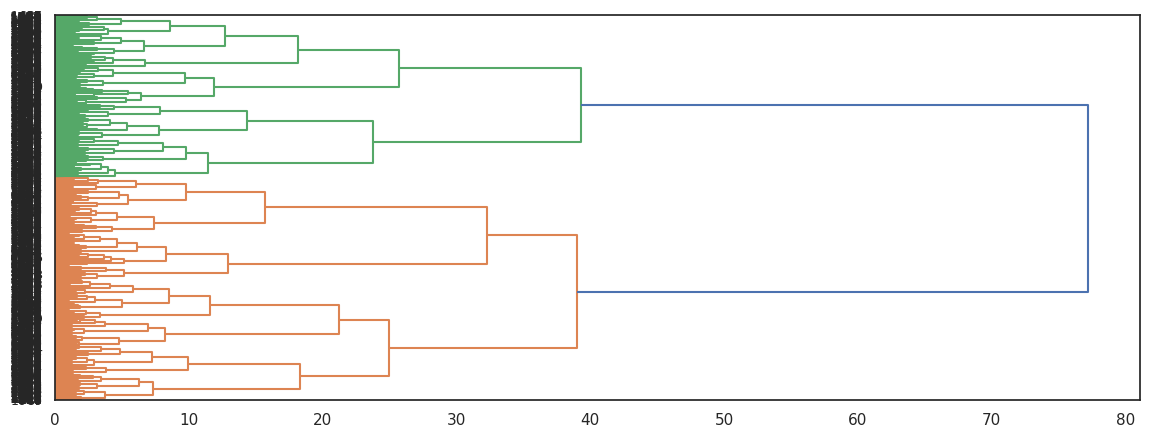

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right')

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [ ]:
# Analisando o dendograma aparentemente tem 3 grandes grupos

In [ ]:
# importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=3, criterion='maxclust')


In [ ]:
new_df_scaled['grupos'] = grupos
new_df['grupos'] = grupos
df['grupos'] = grupos
new_df_scaled.head()

,Recency,Days_Registered,MntTotal,Income,grupos
0,0.310588,1.528348,1.541613,0.314089,3
1,-0.380686,-1.187681,-0.957683,-0.255431,1
2,-0.795450,-0.204973,0.168760,0.964782,2
3,-0.795450,-1.059287,-0.926002,-1.206626,1
4,1.554881,-0.950646,-0.339899,0.321573,1


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

Days_Registered         Axes(0.1,0.559091;0.363636x0.340909)
Income             Axes(0.536364,0.559091;0.363636x0.340909)
MntTotal                    Axes(0.1,0.15;0.363636x0.340909)
Recency                Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

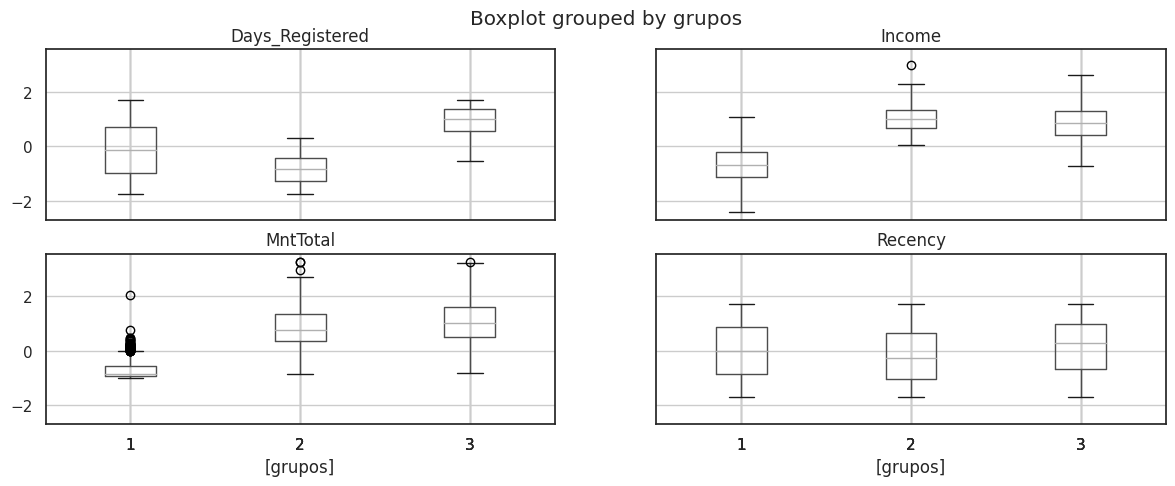

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# boxplot
new_df_scaled.boxplot(by='grupos', return_type='axes')

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

In [ ]:
# sns.set(style='white', rc={'figure.figsize':(10,3)})
import plotly.express as px
grupos = new_df['grupos'].unique()
for c in new_df_scaled.columns:
  if c == 'grupos':
    continue
  
  fig = px.histogram(new_df_scaled, x=c, color="grupos")
  fig.update_layout(
    autosize=False,
    width=800,
    height=300,)
  fig.show()

In [ ]:
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go


# for c in new_df.drop(columns = ['grupos']).columns:
#   fig = make_subplots(rows=1, cols=3, subplot_titles=(c, c, c))

#   fig.append_trace(go.Histogram(x=df[df.grupos==1][c], name='Grupo 1'), row=1, col=1)
#   fig.append_trace(go.Histogram(x=df[df.grupos==2][c], name='Grupo 2'), row=1, col=2)
#   fig.append_trace(go.Histogram(x=df[df.grupos==3][c], name='Grupo 3'), row=1, col=3)

#   fig.show()

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,grupos
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,...,0,0,0,0,0,3,11,1,1445,3
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,...,0,0,0,0,0,3,11,0,25,1
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,...,0,0,0,0,0,3,11,0,665,2
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,...,0,0,0,0,0,3,11,0,43,1
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,...,0,0,0,0,0,3,11,0,376,1


### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

### Para refletir: 


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding